In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression, chi2, SelectKBest

In [2]:
df = pd.read_csv('featured_data.csv', index_col=0)

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.drop('User_ID', axis=1, inplace=True)

In [5]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
len(df.columns)-1

7

### Variance Threshold 

In [7]:
X = df.drop(labels='Calories', axis=1)
y = df['Calories']

In [8]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
vt = VarianceThreshold(threshold=0)
vt.fit(X_train)

VarianceThreshold(threshold=0)

In [10]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [11]:
X_train.columns[vt.get_support()]

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [12]:
len(X_train.columns[vt.get_support()])

7

### Correlation 

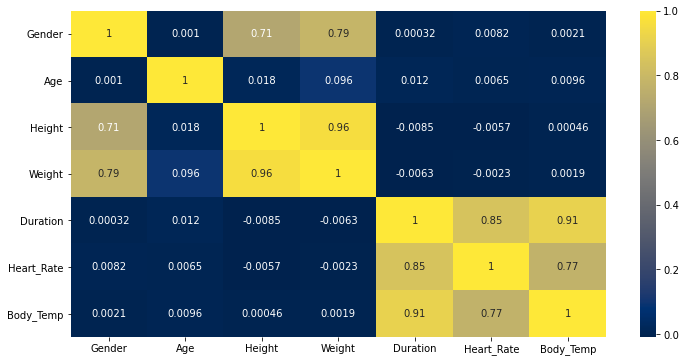

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.cividis)

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.90)

In [16]:
len(set(corr_features))

2

In [17]:
corr_features

{'Body_Temp', 'Weight'}

### Information Gain or Mutual Information 

In [18]:
ig = mutual_info_regression(X_train, y_train)
ig

array([0.01643903, 0.03382518, 0.00253589, 0.01275897, 1.4815269 ,
       0.85396999, 0.96229715])

In [19]:
mutual_info = pd.Series(ig)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Duration      1.481527
Body_Temp     0.962297
Heart_Rate    0.853970
Age           0.033825
Gender        0.016439
Weight        0.012759
Height        0.002536
dtype: float64

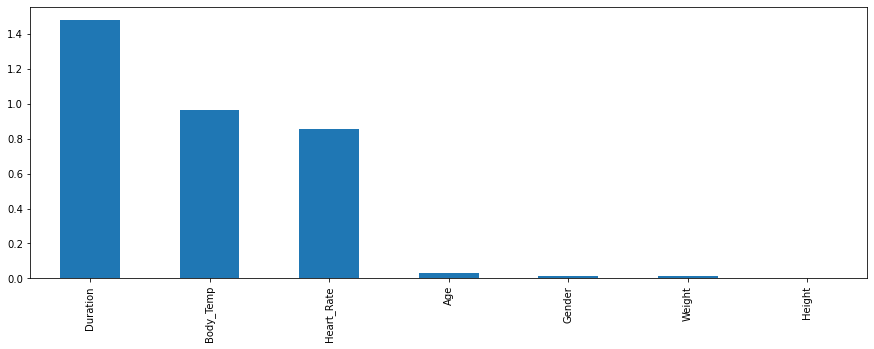

In [20]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [21]:
sp_columns = SelectKBest(mutual_info_regression, k=5)
sp_columns.fit(X_train, y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x0000026AEFED3310>)

In [22]:
sp_columns.get_support()

array([ True,  True, False, False,  True,  True,  True])

In [23]:
X_train.columns[sp_columns.get_support()]

Index(['Gender', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp'], dtype='object')

### Chi2 

In [24]:
chi2 = chi2(X_train, y_train)
chi2

(array([  204.7322076 ,  4680.6641449 ,   444.83473671,  1324.43882225,
        41210.02635547,  7877.56848769,   116.31885466]),
 array([9.98833405e-001, 0.00000000e+000, 1.04736726e-010, 1.63871952e-138,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000]))

In [25]:
p_values=pd.Series(chi2[1])
p_values.index=X_train.columns
p_values

Gender         9.988334e-01
Age            0.000000e+00
Height         1.047367e-10
Weight        1.638720e-138
Duration       0.000000e+00
Heart_Rate     0.000000e+00
Body_Temp      1.000000e+00
dtype: float64

In [26]:
p_values.sort_index(ascending=False)

Weight        1.638720e-138
Height         1.047367e-10
Heart_Rate     0.000000e+00
Gender         9.988334e-01
Duration       0.000000e+00
Body_Temp      1.000000e+00
Age            0.000000e+00
dtype: float64

In [27]:
f1_score=pd.Series(chi2[0])
f1_score.index=X_train.columns
f1_score

Gender          204.732208
Age            4680.664145
Height          444.834737
Weight         1324.438822
Duration      41210.026355
Heart_Rate     7877.568488
Body_Temp       116.318855
dtype: float64

In [28]:
f1_score.sort_values(ascending=False)

Duration      41210.026355
Heart_Rate     7877.568488
Age            4680.664145
Weight         1324.438822
Height          444.834737
Gender          204.732208
Body_Temp       116.318855
dtype: float64

### Selected Features 

In [ ]:
selected_features_df =  
new_df = df.drop(labels=['Gner'])